In [1]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("../../data/01-modified-data/breakin_prediction.csv",encoding ='latin1')
data

,text,label
0,no mention yet of the Libs own lawyer resignin...,0
1,"I want Spidey back. After NWH, my heart broken...",0
2,The owner of a Vancouver butcher shop is calli...,0
3,He had thought she looked cool her eyes shone ...,0
4,nose got broken at a show he popped it back in...,0
...,...,...
95,"For those without a calculator, thatÕs a getti...",1
96,dreamt someone stole my catalytic converter. W...,1
97,To the lady who had her rear window smashed in...,1
98,donÕt leave anything visible in your car. It w...,1


In [3]:
y=data["label"]

#count the frequency of words
vectorizer = CountVectorizer()
matrix = vectorizer.fit_transform(data.text)
X = pd.DataFrame(matrix.toarray(),columns=vectorizer.get_feature_names_out())

In [4]:
#divide the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [5]:
# build and fit the model
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_predict=clf.predict(X_test)
predicted_probas = clf.predict_proba(X_test)

In [6]:
#calculate the accuracy rate
from sklearn.metrics import accuracy_score
accuracy_score(y_test.values,y_predict)

0.925

In [7]:
#calculate the confusion matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
cf=metrics.confusion_matrix(y_test.values, y_predict)
cf

array([[15,  2],
       [ 1, 22]], dtype=int64)

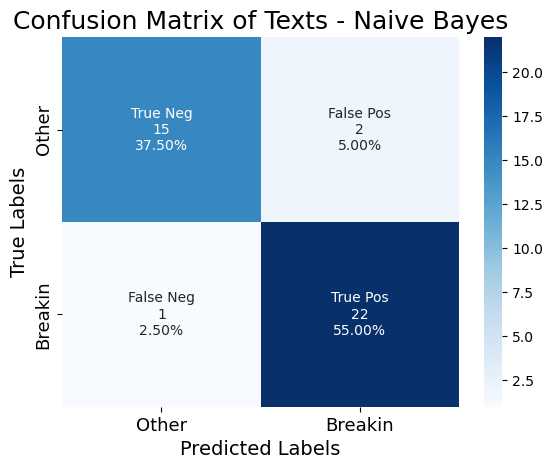

In [8]:
# visualize the confusion Matirx
# customize the anno
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
#plot the heatmap
fig=sns.heatmap(cf, annot=labels, fmt="", cmap='Blues')
plt.title("Confusion Matrix of Texts - Naive Bayes",fontsize=18)
fig.set_xticklabels(["Other","Breakin"],fontsize=13)
fig.set_yticklabels(["Other","Breakin"],fontsize=13)
fig.set_xlabel("Predicted Labels",fontsize=14)
fig.set_ylabel("True Labels",fontsize=14)
plt.show()
heatmap = fig.get_figure()
heatmap.savefig("../../501-project-website/images/confusion_matirx_text_naive_bayes",facecolor=fig.get_facecolor())

In [9]:
#plot the learning Curve
import scikitplot as skplt
probas_list=[y_predict]
clf_names=["Naive Bayes"]
a=skplt.estimators.plot_learning_curve(clf, X, y,text_fontsize=13)
plt.title("Learning Curve of Naive Bayes",fontsize=18)
plt.show()
curve=a.get_figure()
curve.savefig("../../501-project-website/images/learning_curve_text_naive_bayes",facecolor=fig.get_facecolor())

ModuleNotFoundError: No module named 'scikitplot'

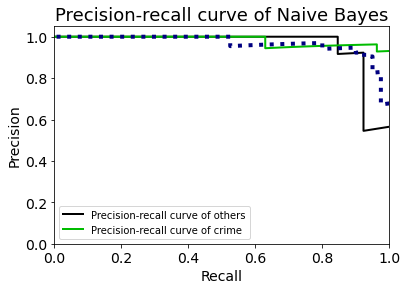

In [ ]:
#plot the Precision-recall curve
skplt.metrics.plot_precision_recall(y_true=y_test, y_probas=predicted_probas,text_fontsize=14)
plt.legend(['Precision-recall curve of others',"Precision-recall curve of crime"])
plt.title("Precision-recall curve of Naive Bayes",fontsize=18)
plt.xlabel("Recall",fontsize=14)
plt.ylabel("Precision",fontsize=14)
plt.savefig("../../501-project-website/images/PR_curve_naive_bayes",facecolor=fig.get_facecolor())